In [4]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import cv2
import time, datetime

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cwd = os.getcwd()
path  = cwd
# dirname = '/content'
dirname = '/content/drive/MyDrive/Colab Notebooks/cse5717/data'

# Data Preparation
- divide the data into 10% and 90% into the training data

In [7]:
# raw data
origin_dir = os.path.join(dirname,'raw')

# processed data
base_dir = os.path.join(dirname, 'dataset')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(base_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

categories = os.listdir(origin_dir)
print(categories)

['metal', 'plastic', 'glass', 'paper', 'compost', 'trash', 'cardboard']


In [8]:
# # copy into train and test
# # only process once, comment out
# from sklearn.model_selection import train_test_split
#from PIL import Image

#for category in categories:
#     category_src_dir = os.path.join(origin_dir, category)
#     train_category_dst_dir = os.path.join(train_dir, category)
#     test_category_dst_dir = os.path.join(test_dir, category)
#     os.makedirs(train_category_dst_dir, exist_ok=True)
#     os.makedirs(test_category_dst_dir, exist_ok=True)

#     file_names = os.listdir(category_src_dir)
#     random.shuffle(file_names)
#     length = len(file_names)
#     train_file_names = file_names[:int(length*0.8)]
#     test_file_names = file_names[int(length*0.8):]

#     for name in train_file_names:
#         src_path = os.path.join(category_src_dir, name)
#         dst_path = os.path.join(train_category_dst_dir, name)
#         shutil.copyfile(src = src_path, dst = dst_path)

#     for name in test_file_names:
#         src_path = os.path.join(category_src_dir, name)
#         dst_path = os.path.join(test_category_dst_dir, name)
#         shutil.copyfile(src = src_path, dst = dst_path)

Training Data Counts:  {'metal': 252, 'plastic': 246, 'glass': 107, 'paper': 452, 'compost': 616, 'trash': 589, 'cardboard': 346}
Test Data Counts:  {'metal': 63, 'plastic': 62, 'glass': 27, 'paper': 113, 'compost': 155, 'trash': 148, 'cardboard': 87}


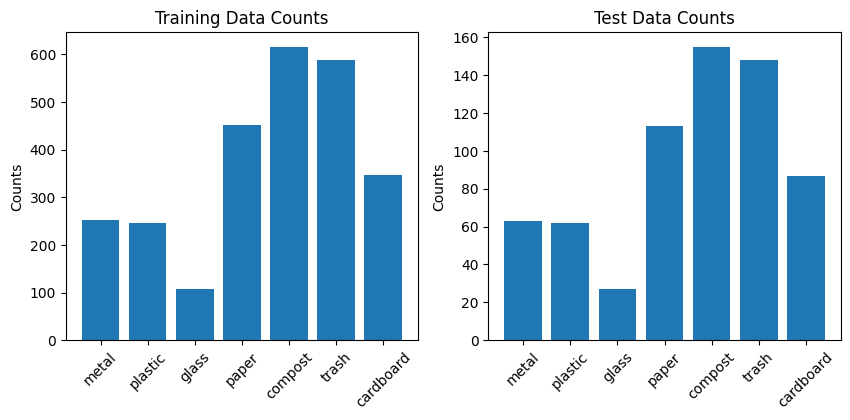

In [9]:
# plot data distribution
def count_images_in_categories(directory):
    category_counts = {}
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        if os.path.isdir(category_dir):
            count = len([name for name in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, name))])
            category_counts[category] = count
    return category_counts

train_counts = count_images_in_categories(train_dir)
test_counts = count_images_in_categories(test_dir)
print('Training Data Counts: ', train_counts)
print('Test Data Counts: ', test_counts)

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].bar(list(train_counts.keys()), list(train_counts.values()))
ax[0].set(title='Training Data Counts', ylabel='Counts')
ax[0].tick_params(axis='x', rotation=45)
ax[1].bar(list(test_counts.keys()), list(test_counts.values()))
ax[1].set(title='Test Data Counts', ylabel='Counts')
ax[1].tick_params(axis='x', rotation=45)
plt.show()

# Convolution Neural Network

## Base Model

In [79]:
# data preprocessing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training', seed = 42)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation', seed = 42)

Found 2079 images belonging to 7 classes.
Found 517 images belonging to 7 classes.


In [80]:
train_sample_count = train_data.samples
validation_sample_count = validation_data.samples
print(train_sample_count, validation_sample_count)

2079 517


In [83]:
# test data processor

test_datagen  = ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    seed = 42)

Found 652 images belonging to 7 classes.
